### Dr. Ignaz Semmelweis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
display(yearly)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### The alarming number of deaths

In [5]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly.deaths / yearly.births

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly.clinic == 'clinic 1']
clinic_2 = yearly[yearly.clinic == 'clinic 2']

# Print out clinic_1
display(clinic_2)

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


### Death at the clinics

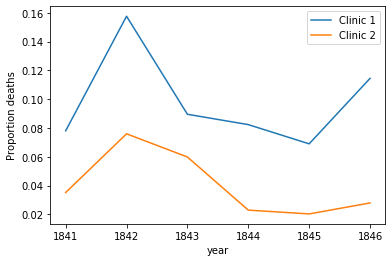

In [8]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x='year', y='proportion_deaths', label='Clinic 1')
clinic_2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)

plt.ylabel("Proportion deaths")
plt.show()

### The handwashing

In [10]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly.deaths/monthly.births

# Print out the first rows in monthly
display(monthly.head())

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### The effect of handwashing

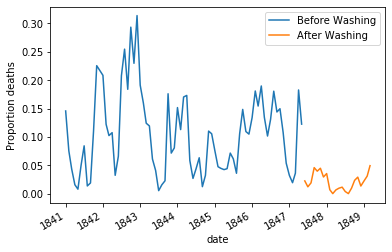

In [13]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', 
              y='proportion_deaths', label='Before Washing')
after_washing.plot(x='date',y='proportion_deaths', label='After Washing', ax=ax)

plt.ylabel("Proportion deaths")
plt.show()

### More handwashing, fewer deaths?

In [14]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths

mean_diff =  after_proportion.mean() - before_proportion.mean()
print(mean_diff)

-0.0839566075118334


### Bootstrap analysis

In [15]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []

for i in range(3000):
    boot_before = before_proportion.sample(replace=True,n=len(before_proportion))
    boot_after = after_proportion.sample(replace=True,n=len(after_proportion))
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975] )
print(confidence_interval)

0.025   -0.101638
0.975   -0.067481
dtype: float64


### Conclusion

In [18]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True
print(doctors_should_wash_their_hands)

True
